# MDEO model: neutrino masses inversion

The idea is to check the neutrino mases inversion to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyMDEO_LesHouches_generator
#import neutrino_analytic_v1

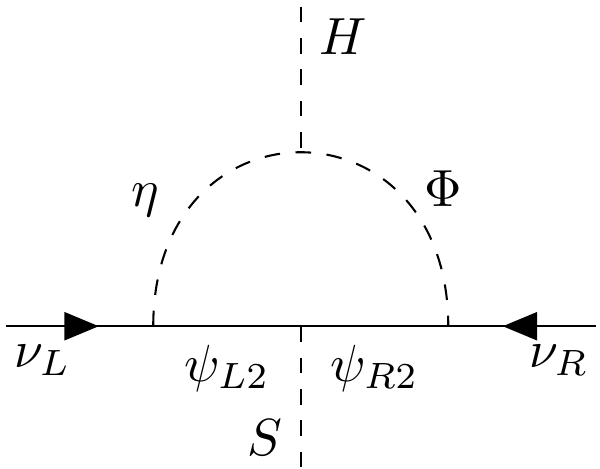

In [3]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/neutrino-diagram.png", width=400)

run diccionary first time

In [4]:
x=[]

#opend the dictionary
xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

Lam1 = 2.225000E-01 
Lam2 = 2.100000E-02   

#Modify parameters
xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2

pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict) 

#run SPheno
spheno = subprocess.getoutput('~/Work/SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')    
so = subprocess.getoutput('cat SPheno.spc.MDEO')

#take spheno data
#ZL ad ZR matrices
ZL11 = eval(so.split('Block LEFTMIX')[1].split()[6])
ZL12 = eval(so.split('Block LEFTMIX')[1].split()[11])
ZL21 = eval(so.split('Block LEFTMIX')[1].split()[16])
ZL22 = eval(so.split('Block LEFTMIX')[1].split()[21])
#print(ZL11,ZL12,ZL21,ZL22)

ZR11 = eval(so.split('Block RIGHTMIX')[1].split()[6])
ZR12 = eval(so.split('Block RIGHTMIX')[1].split()[11])
ZR21 = eval(so.split('Block RIGHTMIX')[1].split()[16])
ZR22 = eval(so.split('Block RIGHTMIX')[1].split()[21])
#print(ZR11,ZR12,ZR21,ZR22)

#ZN etR,ss ->ns mixing
ZN11 = eval(so.split('Block NEUTRALMIX')[1].split()[6])
ZN12 = eval(so.split('Block NEUTRALMIX')[1].split()[11])
ZN21 = eval(so.split('Block NEUTRALMIX')[1].split()[16])
ZN22 = eval(so.split('Block NEUTRALMIX')[1].split()[21])
#print(ZN11,ZN12,ZN21,ZN22)

#YNL and YNR matrices
YnL11 = eval(so.split('Block YNL')[1].split()[7])
YnL12 = eval(so.split('Block YNL')[1].split()[12])
YnL13 = eval(so.split('Block YNL')[1].split()[17])
YnL21 = eval(so.split('Block YNL')[1].split()[22])
YnL22 = eval(so.split('Block YNL')[1].split()[27])
YnL23 = eval(so.split('Block YNL')[1].split()[32])
#print(YnL11,YnL12,YnL13,YnL21,YnL22,YnL23)

YnR11 = eval(so.split('Block YNR')[1].split()[7])
YnR12 = eval(so.split('Block YNR')[1].split()[12])
YnR13 = eval(so.split('Block YNR')[1].split()[17])
YnR21 = eval(so.split('Block YNR')[1].split()[22])
YnR22 = eval(so.split('Block YNR')[1].split()[27])
YnR23 = eval(so.split('Block YNR')[1].split()[32])
#print(YnR11,YnR12,YnR13,YnR21,YnR22,YnR23)

#Masses
mv1 = so.split('Fe_3')[1].split()[1]
if mv1 == 'NaN':
    mv1 = 0.0
else:
    mv1 = eval(so.split('Fe_3')[1].split()[1])
    
mv2 = eval(so.split('Fe_3')[1].split()[5])
mv3 = eval(so.split('Fe_3')[1].split()[9])
mXi_1 = eval(so.split('Fe_3')[1].split()[17])
mXi_2 = eval(so.split('Fe_3')[1].split()[21])
metI = eval(so.split('Fe_3')[1].split()[25])
metp = eval(so.split('Fe_3')[1].split()[29])
mns_1 = eval(so.split('Fe_3')[1].split()[33])
mns_2 = eval(so.split('Fe_3')[1].split()[37])

x.append([ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,ZN21,ZN22,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11','ZN12','ZN21',\
                           'ZN22','YnL11','YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','mv1','mv2','mv3','mXi_1','mXi_2','metI','metp',\
                           'mns_1','mns_2']) 

In [5]:
xd

,ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,...,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2
0,0.882275,-0.470734,0.470734,0.882275,-0.986734,0.162348,-0.162348,-0.986734,1.0,1.390724e-11,...,0.01,0.0,4.952623e-13,5.367904e-11,10866.9514,65681.0516,351274.552,351274.55,351274.552,622651.134


In [6]:
xd[['mv1','mv2','mv3']]

,mv1,mv2,mv3
0,0.0,4.952623e-13,5.367904e-11


### PMNS matrix

In [20]:
#phases of the PMNS matrix and the R 
phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
delta = phases1[0]
eta1 = phases1[1]
eta2 = phases1[2]

#light neutrino masses (up 3 sigma range) NH (NO)
#mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
#Zero in this framework
mnu1 = 1.0e-20
mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1e-18+mnu1**2)
mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1e-18+mnu1**2)

#mixing angles (up 3 sigma range) NH
t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))

#Building PMNS matrix NH
UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))

#Defining the U elementes. readeable
U11 = np.real(U[0,0])
U12 = np.real(U[0,1])
U13 = np.real(U[0,2])
U21 = np.real(U[1,0])
U22 = np.real(U[1,1])
U23 = np.real(U[1,2])
U31 = np.real(U[2,0])
U32 = np.real(U[2,1])
U33 = np.real(U[2,2])

In [21]:
print("mnu1=",mnu1,"mnu2=",mnu2,"mnu3=",mnu3)
print(U)

mnu1= 1e-20 mnu2= 8.619719984821483e-12 mnu3= 4.978238409557654e-11
[[ 0.78668376+0.j  0.60077937+0.j  0.14210143+0.j]
 [-0.52191325+0.j  0.52425976+0.j  0.67287314+0.j]
 [ 0.32975024+0.j -0.60350299+0.j  0.72598135+0.j]]


In [22]:
U11=np.real(U[0,0])
U12=np.real(U[0,1])
U13=np.real(U[0,2])
U21=np.real(U[1,0])
U22=np.real(U[1,1])
U23=np.real(U[1,2])
U31=np.real(U[2,0])
U32=np.real(U[2,1])
U33=np.real(U[2,2])

Neutrino invertion algorithm

$\Lambda_i$ factors

In [23]:
#L1=neutrino_analytic_v2.Lab(ZP22,ZP32,ZP42,ZP52,ZP24,ZP34,ZP44,ZP54,meD1,meD2,mH2,mH3,mH4,mH5,VL11,VL21,UL11,UL21)
#L2=neutrino_analytic_v2.Lab(ZP23,ZP33,ZP43,ZP53,ZP25,ZP35,ZP45,ZP55,meD1,meD2,mH2,mH3,mH4,mH5,VL11,VL21,UL11,UL21)
#print(L1,L2)

#WARNING!!!!
L1 = 1.36390455423e-06
L2= 4.14207141252e-07

In [24]:
#ALGORITM: Particular case(see): inversion-neutrino-matrix.nb
#aij->YnLij
a11 = 0.
a12 = 0.  
#Random
a21 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
a22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
a31 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))    
a32 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
#bij->YnRij Solve in Mathematica
b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
print(b11,b21,b31,b12,b22,b32)

0.00024101418771992723 0.00020989123908051808 -0.0002427804978916307 -8.847169521401983e-05 5.092261212070086e-05 0.00029166447933446206


run dicctionary second time

In [25]:
y=[]

#opend the dictionary
xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

Lam1 = 2.225000E-01 
Lam2 = 2.100000E-02   

#Modify parameters
xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2

##hdij->YnLij
xdict.blocks['YNLIN'].entries[1,1]='%.6E    # YnL(1,1)'%a11
xdict.blocks['YNLIN'].entries[1,2]='%.6E    # YnL(1,2)'%a21
xdict.blocks['YNLIN'].entries[1,3]='%.6E    # YnL(1,3)'%a31
xdict.blocks['YNLIN'].entries[2,1]='%.6E    # YnL(2,1)'%a12
xdict.blocks['YNLIN'].entries[2,2]='%.6E    # YnL(2,2)'%a22
xdict.blocks['YNLIN'].entries[2,3]='%.6E    # YnL(2,3)'%a32

##heij->YnRij
xdict.blocks['YNRIN'].entries[1,1]='%.6E    # YnR(1,1)'%b11
xdict.blocks['YNRIN'].entries[1,2]='%.6E    # YnR(1,2)'%b21
xdict.blocks['YNRIN'].entries[1,3]='%.6E    # YnR(1,3)'%b31
xdict.blocks['YNRIN'].entries[2,1]='%.6E    # YnR(2,1)'%b12
xdict.blocks['YNRIN'].entries[2,2]='%.6E    # YnR(2,2)'%b22
xdict.blocks['YNRIN'].entries[2,3]='%.6E    # YnR(2,3)'%b32

pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict) 

#run SPheno
spheno = subprocess.getoutput('~/Work/SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')    
so = subprocess.getoutput('cat SPheno.spc.MDEO')

#take spheno data
#YNL and YNR matrices
YnL11 = eval(so.split('Block YNL')[1].split()[7])
YnL12 = eval(so.split('Block YNL')[1].split()[12])
YnL13 = eval(so.split('Block YNL')[1].split()[17])
YnL21 = eval(so.split('Block YNL')[1].split()[22])
YnL22 = eval(so.split('Block YNL')[1].split()[27])
YnL23 = eval(so.split('Block YNL')[1].split()[32])
#print(YnL11,YnL12,YnL13,YnL21,YnL22,YnL23)

YnR11 = eval(so.split('Block YNR')[1].split()[7])
YnR12 = eval(so.split('Block YNR')[1].split()[12])
YnR13 = eval(so.split('Block YNR')[1].split()[17])
YnR21 = eval(so.split('Block YNR')[1].split()[22])
YnR22 = eval(so.split('Block YNR')[1].split()[27])
YnR23 = eval(so.split('Block YNR')[1].split()[32])
#print(YnR11,YnR12,YnR13,YnR21,YnR22,YnR23)

#ZL ad ZR matrices
ZL11 = eval(so.split('Block LEFTMIX')[1].split()[6])
ZL12 = eval(so.split('Block LEFTMIX')[1].split()[11])
ZL21 = eval(so.split('Block LEFTMIX')[1].split()[16])
ZL22 = eval(so.split('Block LEFTMIX')[1].split()[21])
#print(ZL11,ZL12,ZL21,ZL22)

ZR11 = eval(so.split('Block RIGHTMIX')[1].split()[6])
ZR12 = eval(so.split('Block RIGHTMIX')[1].split()[11])
ZR21 = eval(so.split('Block RIGHTMIX')[1].split()[16])
ZR22 = eval(so.split('Block RIGHTMIX')[1].split()[21])
#print(ZR11,ZR12,ZR21,ZR22)

#ZN etR,ss ->ns mixing
ZN11 = eval(so.split('Block NEUTRALMIX')[1].split()[6])
ZN12 = eval(so.split('Block NEUTRALMIX')[1].split()[11])
ZN21 = eval(so.split('Block NEUTRALMIX')[1].split()[16])
ZN22 = eval(so.split('Block NEUTRALMIX')[1].split()[21])
#print(ZN11,ZN12,ZN21,ZN22)

#Masses
mv1 = so.split('Fe_3')[1].split()[1]
if mv1 == 'NaN':
    mv1 = 0.0
else:
    mv1 = eval(so.split('Fe_3')[1].split()[1])
    
mv2 = eval(so.split('Fe_3')[1].split()[5])
mv3 = eval(so.split('Fe_3')[1].split()[9])
mXi_1 = eval(so.split('Fe_3')[1].split()[17])
mXi_2 = eval(so.split('Fe_3')[1].split()[21])
metI = eval(so.split('Fe_3')[1].split()[25])
metp = eval(so.split('Fe_3')[1].split()[29])
mns_1 = eval(so.split('Fe_3')[1].split()[33])
mns_2 = eval(so.split('Fe_3')[1].split()[37])

y.append([ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,ZN21,ZN22,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11','ZN12','ZN21',\
                           'ZN22','YnL11','YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','mv1','mv2','mv3','mXi_1','mXi_2','metI','metp',\
                           'mns_1','mns_2']) 

In [26]:
yd[['mv1','mv2','mv3']]

,mv1,mv2,mv3
0,2.618687e-21,7.103955e-15,5.931690e-13


In [27]:
print("=============================================")
print(" Experimental values (PMNS) \n")
print(mnu1,mnu2,mnu3)
print("=============================================")
print(" Rutine inversion \n")
print(mv1,mv2,mv3)
print("=============================================")

 Experimental values (PMNS) 

1e-20 8.619719984821483e-12 4.978238409557654e-11
 Rutine inversion 

2.61868715e-21 7.10395517e-15 5.93169034e-13


Neutrino $M_{ij}^{\nu}$ matrix:

\begin{equation}
M_{ik}^{\nu} = (h_d)^{\alpha i} \Lambda^{\alpha\beta} (h_e)^{\beta k}
\end{equation}

In [19]:
y=[]

for i in range(0,xd.shape[0]):
    
    a = neutrino_analytic_v2.Mab(xd.ZP22[i],xd.ZP23[i],xd.ZP24[i],xd.ZP25[i],xd.ZP32[i],xd.ZP33[i],xd.ZP34[i],xd.ZP35[i],xd.ZP42[i],xd.ZP43[i],\
                           xd.ZP44[i],xd.ZP45[i],xd.ZP52[i],xd.ZP53[i],xd.ZP54[i],xd.ZP55[i],xd.meD1[i],xd.meD2[i],\
    xd.mH2[i],xd.mH3[i],xd.mH4[i],xd.mH5[i],xd.VL11[i],xd.VL21[i],xd.UL11[i],xd.UL21[i],xd.LD11[i],xd.LD12[i],\
    xd.LD13[i],xd.LD21[i],xd.LD22[i],xd.LD23[i],xd.LE11[i],xd.LE12[i],0.,xd.LE21[i],xd.LE22[i],0.)
    
    mn1 = a[0]
    mn2 = a[1]
    mn3 = a[2]
    
    y.append([mn1,mn2,mn3])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])

In [20]:
yd[:2]

,mn1,mn2,mn3
0,3.713443e-16,3.186668e-10,3.590529e-08


In [18]:
xd[['mnu1','mnu2','mnu3']][:2]

,mnu1,mnu2,mnu3
0,9.575239e-27,5.634659e-10,5.645737e-08


In [13]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

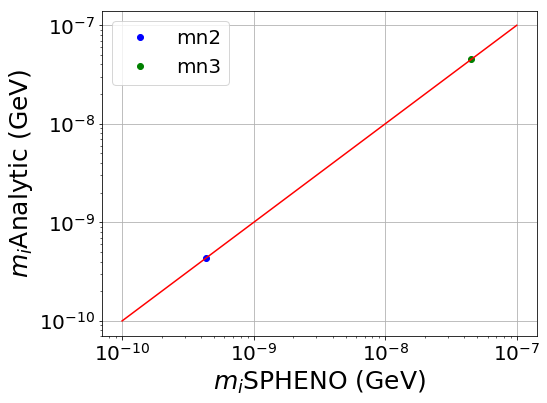

In [14]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,yd.mn2,'bo')
plt.loglog(xd.mnu3,yd.mn3,'go')

a = np.linspace(1e-10,1e-07,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')